<a href="https://colab.research.google.com/github/lucaslapazini95/pratica-com-pandas/blob/main/air_bnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traduzir para PT-BR

https://storage.googleapis.com/igorgondimfreebuck/amsterdam_weekdays.csv

#Installation,libs and import

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
import pandas as pd
import os
from google.cloud import storage
import pandera as pa

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/igorgondimfreebuck/amsterdam_weekdays.csv", sep=",")

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


#Cleaning

In [ ]:
dfback = df.copy()

In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
df.rename(columns={'room_type':'tipo_quarto', 'room_shared':'quarto_compartilhado', 'room_private':'quarto_privado'},inplace=True)

In [ ]:
df.rename(columns={'person_capacity':'capacidade_pessoas','host_is_superhost':'superanfitriao', 'cleanliness_rating':'pontuacao_limpeza'},inplace=True)

In [ ]:
df.rename(columns={'bedrooms':'quartos', 'metro_dist':'dist_metro','multi':'multi_quartos','biz':'negocios'},inplace=True)

In [ ]:
df.rename(columns={'guest_satisfaction_overall':'satisfacao_hospedes_geral','dist':'dist_cidade','realSum':'preco_total'},inplace=True)

In [ ]:
df

,Unnamed: 0,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df

,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.dtypes

preco_total                  float64
tipo_quarto                   object
quarto_compartilhado            bool
quarto_privado                  bool
capacidade_pessoas           float64
superanfitriao                  bool
multi_quartos                  int64
negocios                       int64
pontuacao_limpeza            float64
satisfacao_hospedes_geral    float64
quartos                        int64
dist_cidade                  float64
dist_metro                   float64
attr_index                   float64
attr_index_norm              float64
rest_index                   float64
rest_index_norm              float64
lng                          float64
lat                          float64
dtype: object

In [ ]:
df.count()

preco_total                  1103
tipo_quarto                  1103
quarto_compartilhado         1103
quarto_privado               1103
capacidade_pessoas           1103
superanfitriao               1103
multi_quartos                1103
negocios                     1103
pontuacao_limpeza            1103
satisfacao_hospedes_geral    1103
quartos                      1103
dist_cidade                  1103
dist_metro                   1103
attr_index                   1103
attr_index_norm              1103
rest_index                   1103
rest_index_norm              1103
lng                          1103
lat                          1103
dtype: int64

In [ ]:
df.isna().sum()

preco_total                  0
tipo_quarto                  0
quarto_compartilhado         0
quarto_privado               0
capacidade_pessoas           0
superanfitriao               0
multi_quartos                0
negocios                     0
pontuacao_limpeza            0
satisfacao_hospedes_geral    0
quartos                      0
dist_cidade                  0
dist_metro                   0
attr_index                   0
attr_index_norm              0
rest_index                   0
rest_index_norm              0
lng                          0
lat                          0
dtype: int64

In [ ]:
pd.unique(df['multi_quartos'])

array([1, 0])

In [ ]:
dfback = df.copy()

In [ ]:
df=dfback.copy()

In [ ]:
df

,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.dtypes

preco_total                  float64
tipo_quarto                   object
quarto_compartilhado            bool
quarto_privado                  bool
capacidade_pessoas           float64
superanfitriao                  bool
multi_quartos                  int64
negocios                       int64
pontuacao_limpeza            float64
satisfacao_hospedes_geral    float64
quartos                        int64
dist_cidade                  float64
dist_metro                   float64
attr_index                   float64
attr_index_norm              float64
rest_index                   float64
rest_index_norm              float64
lng                          float64
lat                          float64
dtype: object

In [ ]:
df=df[['preco_total','tipo_quarto','quarto_compartilhado','quarto_privado','capacidade_pessoas','superanfitriao','multi_quartos','negocios','pontuacao_limpeza','satisfacao_hospedes_geral','quartos','dist_cidade','dist_metro','lng','lat']]
df

,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,4.90688,52.35794


In [ ]:
df.dtypes

preco_total                  float64
tipo_quarto                   object
quarto_compartilhado            bool
quarto_privado                  bool
capacidade_pessoas           float64
superanfitriao                  bool
multi_quartos                  int64
negocios                       int64
pontuacao_limpeza            float64
satisfacao_hospedes_geral    float64
quartos                        int64
dist_cidade                  float64
dist_metro                   float64
lng                          float64
lat                          float64
dtype: object

#Schema validation

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'preco_total':pa.Column(pa.Float),
        'tipo_quarto':pa.Column(pa.String),
        'quarto_compartilhado':pa.Column(pa.Bool),
        'quarto_privado':pa.Column(pa.Bool),
        'capacidade_pessoas':pa.Column(pa.Float),
        'superanfitriao':pa.Column(pa.Bool),
        'multi_quartos':pa.Column(pa.Int),
        'negocios':pa.Column(pa.Int),
        'pontuacao_limpeza':pa.Column(pa.Float),
        'satisfacao_hospedes_geral':pa.Column(pa.Float),
        'quartos':pa.Column(pa.Int),
        'dist_cidade':pa.Column(pa.Float),
        'dist_metro':pa.Column(pa.Float),
        'lng':pa.Column(pa.Float),
        'lat':pa.Column(pa.Float)
    }
)

In [ ]:
schema.validate(df)

,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,4.90688,52.35794


#Query

In [ ]:
df.loc[df.tipo_quarto == 'Private room',['tipo_quarto']] = 'Quarto privado'
df.loc[df.tipo_quarto == 'Entire home/apt',['tipo_quarto']] = 'Casa/AP Inteiro'
df.loc[df.tipo_quarto == 'Shared room',['tipo_quarto']] = 'Quarto compartilhado'
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,lng,lat
0,194.033698,Quarto privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,Quarto privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,Quarto privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,Quarto privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,485.552926,Quarto privado,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Casa/AP Inteiro,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,4.85869,52.37677
1099,233.637194,Quarto privado,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,4.83611,52.34910
1100,317.062311,Quarto privado,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,4.88897,52.37798
1101,1812.855904,Casa/AP Inteiro,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,4.90688,52.35794


#GroupBY

In [ ]:
df.groupby(['quarto_privado']).size().sort_values(ascending=False)

quarto_privado
True     559
False    544
dtype: int64

In [ ]:
df.groupby(['quarto_compartilhado']).size().sort_values(ascending=False)

quarto_compartilhado
False    1097
True        6
dtype: int64

In [ ]:
df.groupby(['tipo_quarto']).size().sort_values(ascending=False)

tipo_quarto
Private room       559
Entire home/apt    538
Shared room          6
dtype: int64

In [ ]:
df.groupby(['capacidade_pessoas']).size().sort_values(ascending=False)

capacidade_pessoas
2.0    656
4.0    333
3.0     79
6.0     24
5.0     11
dtype: int64

# Plotting

In [ ]:
df.head(4)

,preco_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,superanfitriao,multi_quartos,negocios,pontuacao_limpeza,satisfacao_hospedes_geral,quartos,dist_cidade,dist_metro,lng,lat
0,194.033698,Quarto privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,Quarto privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,Quarto privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,Quarto privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663


<AxesSubplot:ylabel='Tipos de locação'>

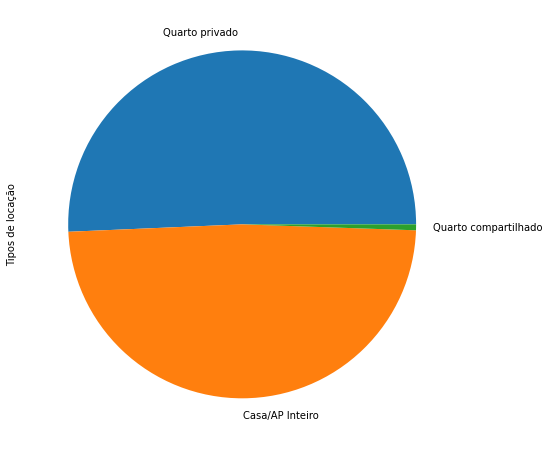

In [ ]:
df.groupby(['tipo_quarto']).size().sort_values(ascending=False).plot.pie(figsize=(12,8),ylabel='Tipos de locação')

<AxesSubplot:xlabel='Capacidade de pessoas', ylabel='Nº de locações'>

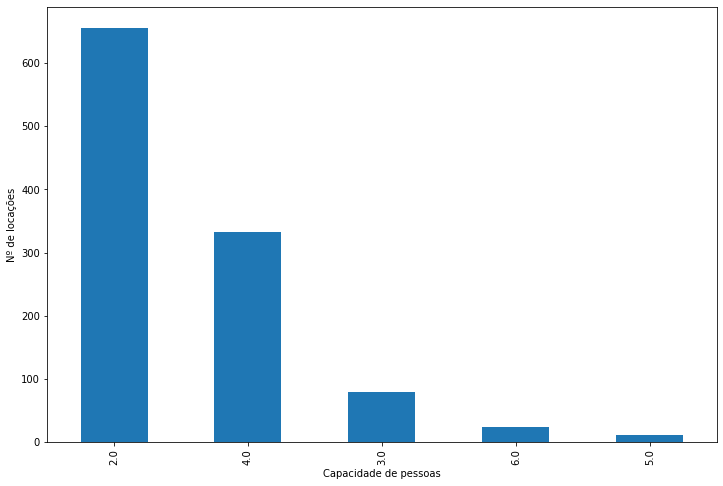

In [ ]:
df.groupby(['capacidade_pessoas']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Capacidade de pessoas',ylabel='Nº de locações')

<AxesSubplot:ylabel='Relação apartamentos para negocios'>

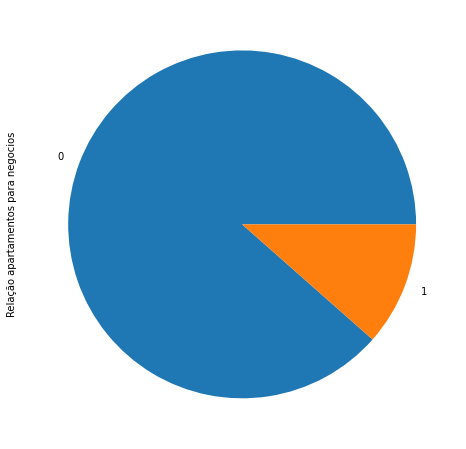

In [ ]:
df.groupby(['negocios']).size().sort_values(ascending=False).plot.pie(figsize=(12,8),ylabel='Relação apartamentos para negocios')